# _Session 2: Data Cleaning for Pattern Recognition_

## _Using the [Framingham Heart Study Dataset](https://github.com/GauravPadawe/Framingham-Heart-Study/blob/master/framingham.csv)_

## Learning Objectives
- Understand the importance of preprocessing and data cleaning in medical data analysis
- Learn to handle missing data, outliers, and imbalanced datasets
- Master normalization and feature scaling techniques
- Build reproducible preprocessing pipelines


## About the Framingham Heart Study

The **Framingham Heart Study** is one of the most famous longitudinal cardiovascular studies in medical history. Started in 1948, it has been fundamental in identifying cardiovascular disease (CVD) risk factors.

### Why This Dataset is Perfect for Learning:
- **Real-world significance**: Led to discovery of major CVD risk factors
- **Clinical relevance**: Used in actual medical practice for risk prediction
- **Preprocessing challenges**: Missing values, mixed data types, class imbalance
- **Educational value**: Combines biomedical knowledge with data science

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## _Part 1: Loading and Exploring the Framingham Dataset_

In [27]:
df = pd.read_csv("framingham.csv")

In [28]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [29]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 5

### Understanding the Features

| Feature | Description | Type | Clinical Significance |
|---------|-------------|------|----------------------|
| **male** | Gender (1=Male, 0=Female) | Binary | Men have higher CVD risk |
| **age** | Age in years | Continuous | Major risk factor |
| **education** | Education level (1-4) | Categorical | Socioeconomic indicator |
| **currentSmoker** | Currently smokes | Binary | Major modifiable risk |
| **cigsPerDay** | Cigarettes per day | Continuous | Dose-dependent risk |
| **BPMeds** | On BP medication | Binary | Indicates hypertension |
| **prevalentStroke** | Prior stroke | Binary | High-risk indicator |
| **prevalentHyp** | Hypertensive | Binary | Major risk factor |
| **diabetes** | Has diabetes | Binary | Major risk factor |
| **totChol** | Total cholesterol (mg/dL) | Continuous | Lipid profile |
| **sysBP** | Systolic BP (mmHg) | Continuous | Blood pressure upper |
| **diaBP** | Diastolic BP (mmHg) | Continuous | Blood pressure lower |
| **BMI** | Body Mass Index | Continuous | Obesity measure |
| **heartRate** | Heart rate (bpm) | Continuous | Cardiac function |
| **glucose** | Glucose level (mg/dL) | Continuous | Diabetes indicator |
| **TenYearCHD** | **TARGET**: 10-year CHD risk | Binary | **What we predict** |

In [30]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## _Part 2: Data Quality Assessment_

### Step 1: Check for Missing Values

In [31]:
print("Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
})

missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
print(missing_data.to_string(index=False))

print(f"\nTotal missing values in dataset: {df.isnull().sum().sum():,}")
print(f"Percentage of data that is missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing Values Analysis:
         Column  Missing_Count  Missing_Percentage Data_Type
        glucose            388            9.150943   float64
      education            105            2.476415   float64
         BPMeds             53            1.250000   float64
        totChol             50            1.179245   float64
     cigsPerDay             29            0.683962   float64
            BMI             19            0.448113   float64
      heartRate              1            0.023585   float64
           male              0            0.000000     int64
            age              0            0.000000     int64
  currentSmoker              0            0.000000     int64
prevalentStroke              0            0.000000     int64
   prevalentHyp              0            0.000000     int64
       diabetes              0            0.000000     int64
          sysBP              0            0.000000   float64
          diaBP              0            0.000000   float64

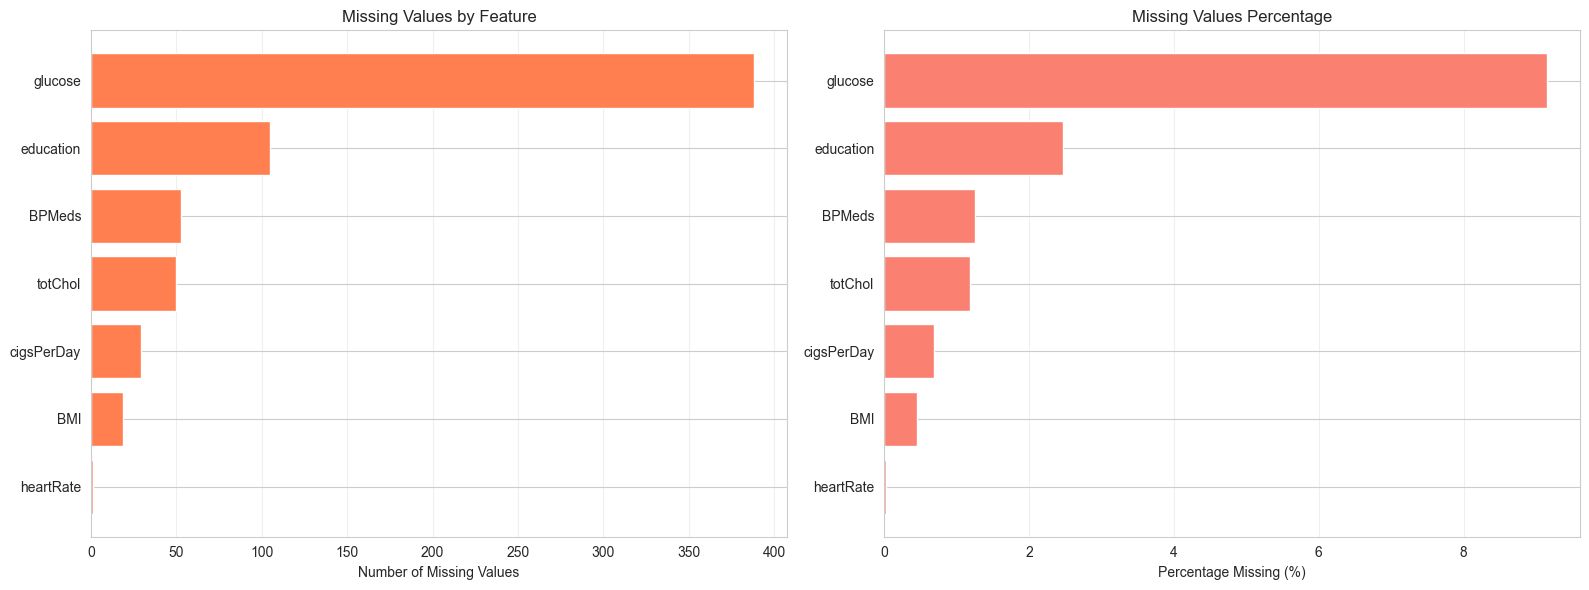

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=True)

if len(missing_counts) > 0:
    axes[0].barh(range(len(missing_counts)), missing_counts.values, color='coral')
    axes[0].set_yticks(range(len(missing_counts)))
    axes[0].set_yticklabels(missing_counts.index)
    axes[0].set_xlabel('Number of Missing Values')
    axes[0].set_title('Missing Values by Feature')
    axes[0].grid(axis='x', alpha=0.3)

    missing_pct = (missing_counts / len(df) * 100)
    axes[1].barh(range(len(missing_pct)), missing_pct.values, color='salmon')
    axes[1].set_yticks(range(len(missing_pct)))
    axes[1].set_yticklabels(missing_pct.index)
    axes[1].set_xlabel('Percentage Missing (%)')
    axes[1].set_title('Missing Values Percentage')
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'No Missing Values!', ha='center', va='center', fontsize=16)
    axes[1].text(0.5, 0.5, 'Complete Dataset', ha='center', va='center', fontsize=16)

plt.tight_layout()
plt.show()

Now that we've identified missing values, let's handle them appropriately based on the feature type:

**Strategy:**
- **Continuous features** (age, cigsPerDay, totChol, BMI, heartRate, glucose, etc.): Replace with **median** (robust to outliers)
- **Categorical/Binary features** (education, BPMeds): Replace with **mode** (most frequent value)

**Note.** One of the best methods for imputing features is `KNNImputer`; It won't be discussed in this notebook, but I highly encourage you to experiment with it.

In [33]:
df_clean = df.copy()
continuous_features = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
categorical_features = ['education', 'BPMeds']

print("Imputing missing values...")
print("="*80)

# Impute continuous features with MEDIAN (robust to outliers)
for feature in continuous_features:
    if df_clean[feature].isnull().sum() > 0:
        median_value = df_clean[feature].median()
        missing_count = df_clean[feature].isnull().sum()
        df_clean[feature].fillna(median_value, inplace=True)
        print(f"✓ {feature:12s}: Filled {missing_count:3d} missing values with MEDIAN = {median_value:.2f}")

# Impute categorical/binary features with MODE (most frequent value)
for feature in categorical_features:
    if df_clean[feature].isnull().sum() > 0:
        mode_value = df_clean[feature].mode()[0]
        missing_count = df_clean[feature].isnull().sum()
        df_clean[feature].fillna(mode_value, inplace=True)
        print(f"✓ {feature:12s}: Filled {missing_count:3d} missing values with MODE = {mode_value:.2f}")

print("\n" + "="*80)
print(f"Missing values BEFORE imputation: {df.isnull().sum().sum()}")
print(f"Missing values AFTER imputation:  {df_clean.isnull().sum().sum()}")
print("="*80)

Imputing missing values...
✓ cigsPerDay  : Filled  29 missing values with MEDIAN = 0.00
✓ totChol     : Filled  50 missing values with MEDIAN = 234.00
✓ BMI         : Filled  19 missing values with MEDIAN = 25.40
✓ heartRate   : Filled   1 missing values with MEDIAN = 75.00
✓ glucose     : Filled 388 missing values with MEDIAN = 78.00
✓ education   : Filled 105 missing values with MODE = 1.00
✓ BPMeds      : Filled  53 missing values with MODE = 0.00

Missing values BEFORE imputation: 645
Missing values AFTER imputation:  0


In [34]:
missing_after = df_clean.isnull().sum()
if missing_after.sum() == 0:
    print("No missing values remain in the dataset.")
    print("\nDataset is now ready for further analysis!")
else:
    print(missing_after[missing_after > 0])
    
print("\n" + "="*80)
print(f"Shape of cleaned dataset: {df_clean.shape}")
print(f"Total patients: {len(df_clean):,}")

No missing values remain in the dataset.

Dataset is now ready for further analysis!

Shape of cleaned dataset: (4240, 16)
Total patients: 4,240


### Step 2: Class Distribution Analysis (Using Cleaned Data)

**Critical for Medical Data:** Check if the dataset is imbalanced (rare disease vs. healthy)

We'll use the cleaned dataset (`df_clean`) from now on, which has all missing values properly imputed.

In [35]:
print("Target Variable (TenYearCHD) Distribution:")
target_counts = df_clean['TenYearCHD'].value_counts()
target_pct = df_clean['TenYearCHD'].value_counts(normalize=True) * 100

print(f"No CHD (0): {target_counts[0]:,} patients ({target_pct[0]:.2f}%)")
print(f"CHD (1):    {target_counts[1]:,} patients ({target_pct[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: {target_counts[0]/target_counts[1]:.2f}:1")

Target Variable (TenYearCHD) Distribution:
No CHD (0): 3,596 patients (84.81%)
CHD (1):    644 patients (15.19%)

Class Imbalance Ratio: 5.58:1


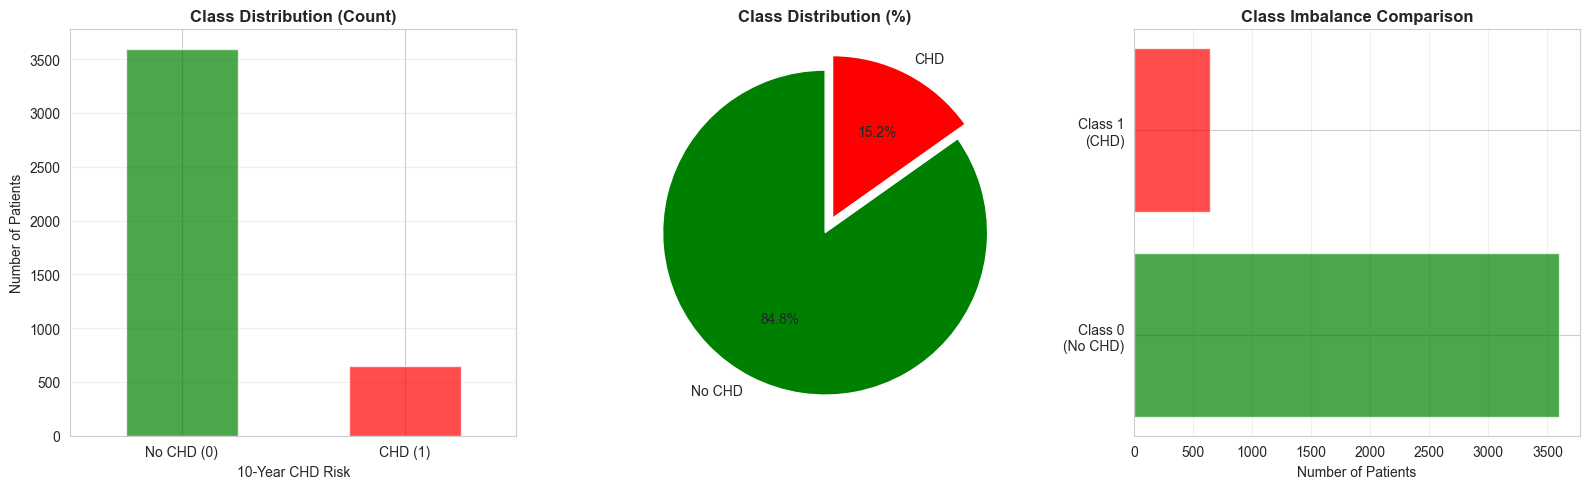

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

target_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('10-Year CHD Risk')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xticklabels(['No CHD (0)', 'CHD (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_counts, labels=['No CHD', 'CHD'], autopct='%1.1f%%',
            colors=['green', 'red'], startangle=90, explode=(0, 0.1))
axes[1].set_title('Class Distribution (%)', fontsize=12, fontweight='bold')

# Imbalance visualization
axes[2].barh(['Class 0\n(No CHD)', 'Class 1\n(CHD)'], 
             [target_counts[0], target_counts[1]], 
             color=['green', 'red'], alpha=0.7)
axes[2].set_xlabel('Number of Patients')
axes[2].set_title('Class Imbalance Comparison', fontsize=12, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 3: Handling Class Imbalance

**Problem Detected:** We have a significant class imbalance (5.58:1 ratio).

**Why This Matters in Medical Data:**
- Models may become biased toward predicting the majority class (No CHD)
- Minority class (CHD patients) predictions are often more important clinically
- Missing a CHD case (false negative) can be life-threatening

**Solutions to Handle Imbalance:**

1. **Oversampling (SMOTE)**: Create synthetic samples of the minority class
   - ✅ Increases minority class representation
   - ⚠️ May lead to overfitting if not careful
   
2. **Undersampling**: Randomly remove samples from the majority class
   - ✅ Fast and simple
   - ⚠️ Loses potentially useful information
   
3. **Class Weights**: Assign higher weights to minority class during training
   - ✅ No data modification needed
   - ✅ Works well with most algorithms
   
Let's implement and compare these approaches!

In [37]:
X_balance = df_clean.drop('TenYearCHD', axis=1)
y_balance = df_clean['TenYearCHD']

print("Original Dataset Distribution:")
print("="*80)
print(f"Class 0 (No CHD): {(y_balance == 0).sum():,} samples ({(y_balance == 0).sum()/len(y_balance)*100:.2f}%)")
print(f"Class 1 (CHD):    {(y_balance == 1).sum():,} samples ({(y_balance == 1).sum()/len(y_balance)*100:.2f}%)")
print(f"Imbalance Ratio: {(y_balance == 0).sum() / (y_balance == 1).sum():.2f}:1")
print("="*80)

Original Dataset Distribution:
Class 0 (No CHD): 3,596 samples (84.81%)
Class 1 (CHD):    644 samples (15.19%)
Imbalance Ratio: 5.58:1


In [38]:
# Method 1: SMOTE (Synthetic Minority Over-sampling Technique)
print("\n1. SMOTE Oversampling:")
print("="*80)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_balance, y_balance)

print(f"After SMOTE:")
print(f"  Class 0 (No CHD): {(y_smote == 0).sum():,} samples")
print(f"  Class 1 (CHD):    {(y_smote == 1).sum():,} samples")
print(f"  Total samples: {len(y_smote):,} (increased from {len(y_balance):,})")
print(f"  New ratio: {(y_smote == 0).sum() / (y_smote == 1).sum():.2f}:1")

# Method 2: Random Undersampling
print("\n2. Random Undersampling:")
print("="*80)

undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_balance, y_balance)

print(f"After Undersampling:")
print(f"  Class 0 (No CHD): {(y_under == 0).sum():,} samples")
print(f"  Class 1 (CHD):    {(y_under == 1).sum():,} samples")
print(f"  Total samples: {len(y_under):,} (decreased from {len(y_balance):,})")
print(f"  New ratio: {(y_under == 0).sum() / (y_under == 1).sum():.2f}:1")

# Method 3: Random Oversampling (for comparison)
print("\n3. Random Oversampling:")
print("="*80)

oversample = RandomOverSampler(random_state=42)
X_over, y_over = oversample.fit_resample(X_balance, y_balance)

print(f"After Random Oversampling:")
print(f"  Class 0 (No CHD): {(y_over == 0).sum():,} samples")
print(f"  Class 1 (CHD):    {(y_over == 1).sum():,} samples")
print(f"  Total samples: {len(y_over):,} (increased from {len(y_balance):,})")
print(f"  New ratio: {(y_over == 0).sum() / (y_over == 1).sum():.2f}:1")
print("\n" + "="*80)


1. SMOTE Oversampling:
After SMOTE:
  Class 0 (No CHD): 3,596 samples
  Class 1 (CHD):    3,596 samples
  Total samples: 7,192 (increased from 4,240)
  New ratio: 1.00:1

2. Random Undersampling:
After Undersampling:
  Class 0 (No CHD): 644 samples
  Class 1 (CHD):    644 samples
  Total samples: 1,288 (decreased from 4,240)
  New ratio: 1.00:1

3. Random Oversampling:
After Random Oversampling:
  Class 0 (No CHD): 3,596 samples
  Class 1 (CHD):    3,596 samples
  Total samples: 7,192 (increased from 4,240)
  New ratio: 1.00:1



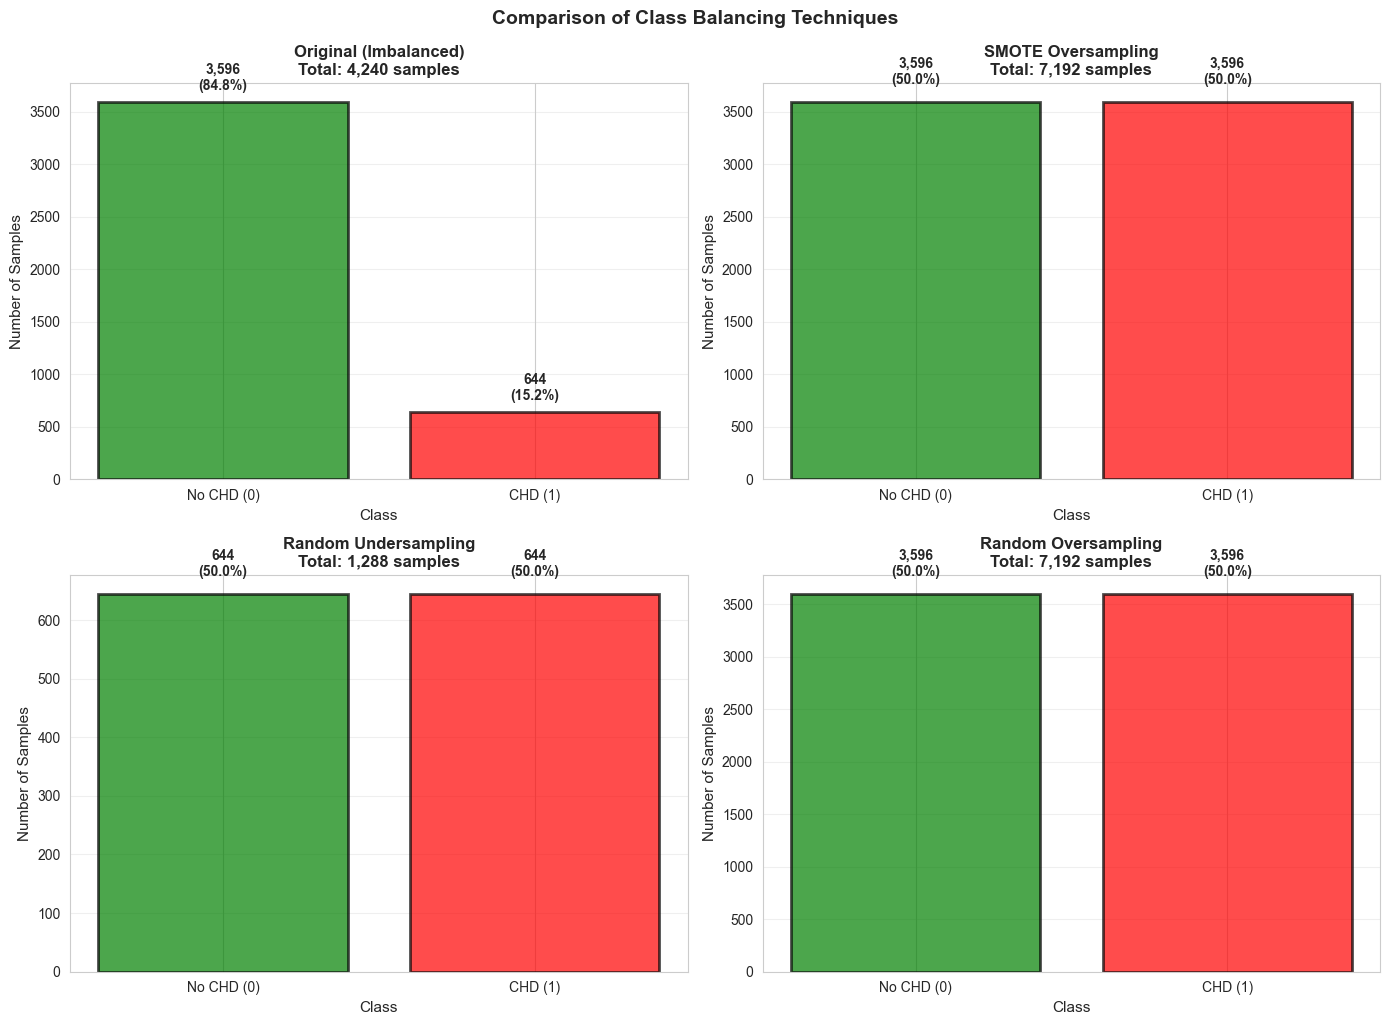

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

datasets = [
    ('Original (Imbalanced)', y_balance, 'Original'),
    ('SMOTE Oversampling', y_smote, 'SMOTE'),
    ('Random Undersampling', y_under, 'Undersample'),
    ('Random Oversampling', y_over, 'Oversample')
]

for idx, (title, y_data, label) in enumerate(datasets):
    ax = axes[idx // 2, idx % 2]
    
    counts = y_data.value_counts().sort_index()
    colors = ['green', 'red']
    
    # Bar chart
    ax.bar([0, 1], counts.values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax.set_xlabel('Class', fontsize=11)
    ax.set_ylabel('Number of Samples', fontsize=11)
    ax.set_title(f'{title}\nTotal: {len(y_data):,} samples', fontweight='bold', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No CHD (0)', 'CHD (1)'])
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (cls, count) in enumerate(counts.items()):
        percentage = count / len(y_data) * 100
        ax.text(i, count + len(y_data) * 0.02, f'{count:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.suptitle('Comparison of Class Balancing Techniques', y=1.02, fontsize=14, fontweight='bold')
plt.show()

### Which Balancing Method Should You Choose?

| Method | Pros | Cons | When to Use |
|--------|------|------|-------------|
| **SMOTE** | Creates synthetic samples intelligently | Can introduce noise | **Best for most cases** - balances without data loss |
| **Random Oversampling** | Simple, preserves all data | Exact duplicates may cause overfitting | Small minority class |
| **Undersampling** | Fast, reduces dataset size | **Loses information** from majority class | Very large datasets only |
| **Class Weights** | No data modification | Requires algorithm support | When you want original data distribution |

**Recommendation for Medical Data:**
- ✅ **SMOTE** is usually the best choice - it creates synthetic but realistic samples
- ⚠️ Avoid undersampling unless you have a very large dataset - you can't afford to lose patient data!
- 🔍 Always validate on original (imbalanced) test set to ensure real-world performance

### Step 3: Feature Distribution Analysis (Using Cleaned Data)

Now let's visualize how our features are distributed after cleaning:

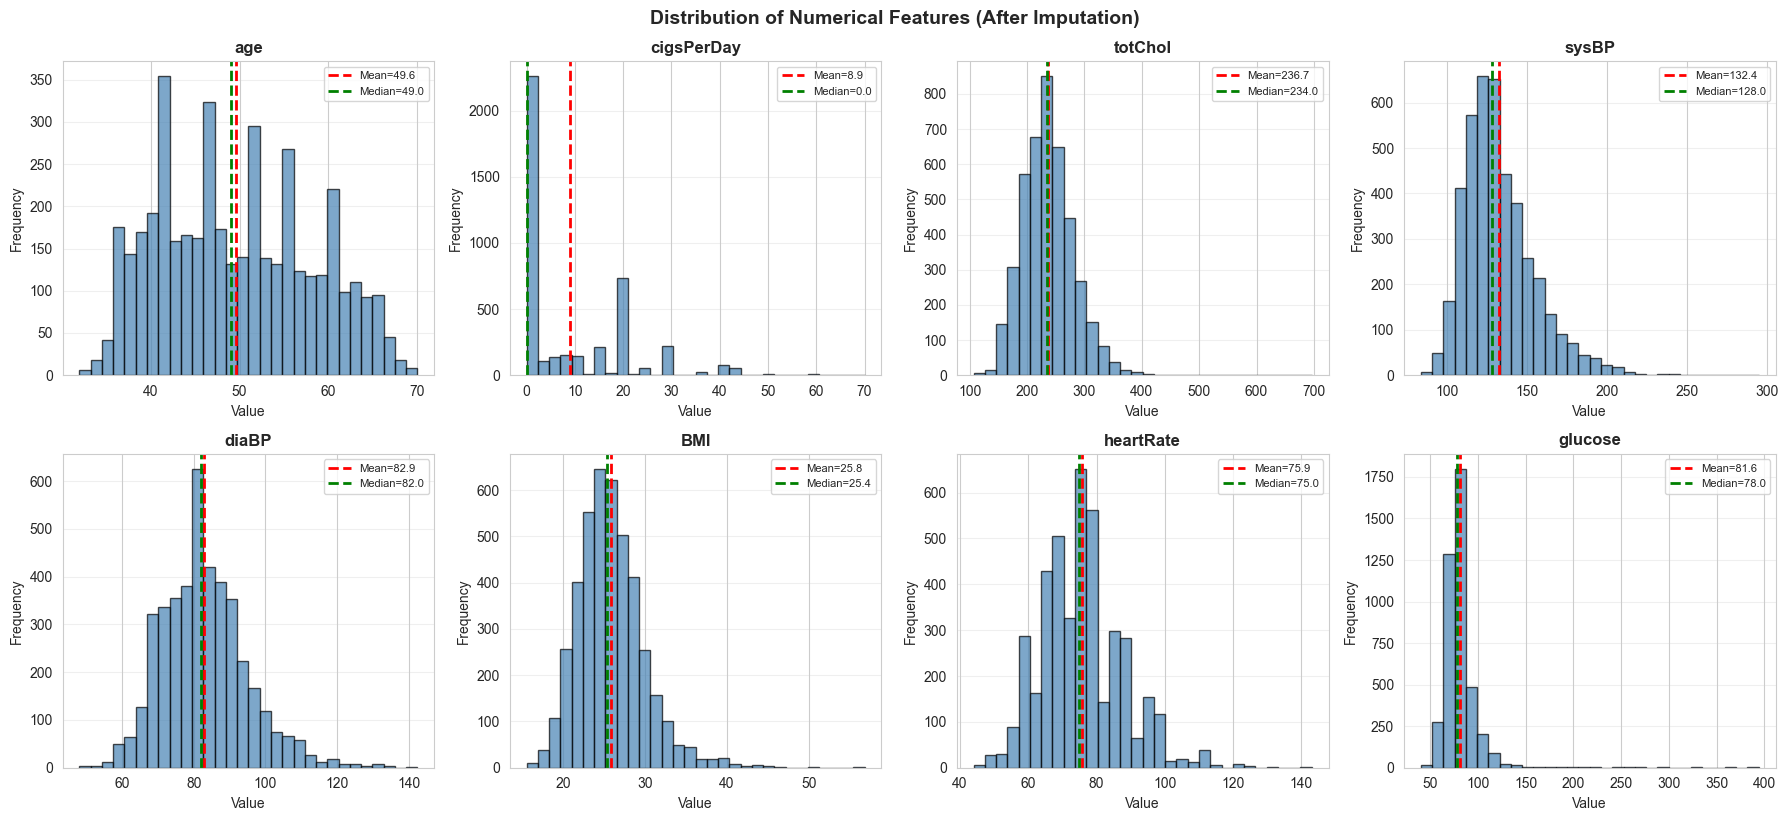

In [40]:
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean={mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median={median_val:.1f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features (After Imputation)', y=1.02, fontsize=14, fontweight='bold')
plt.show()

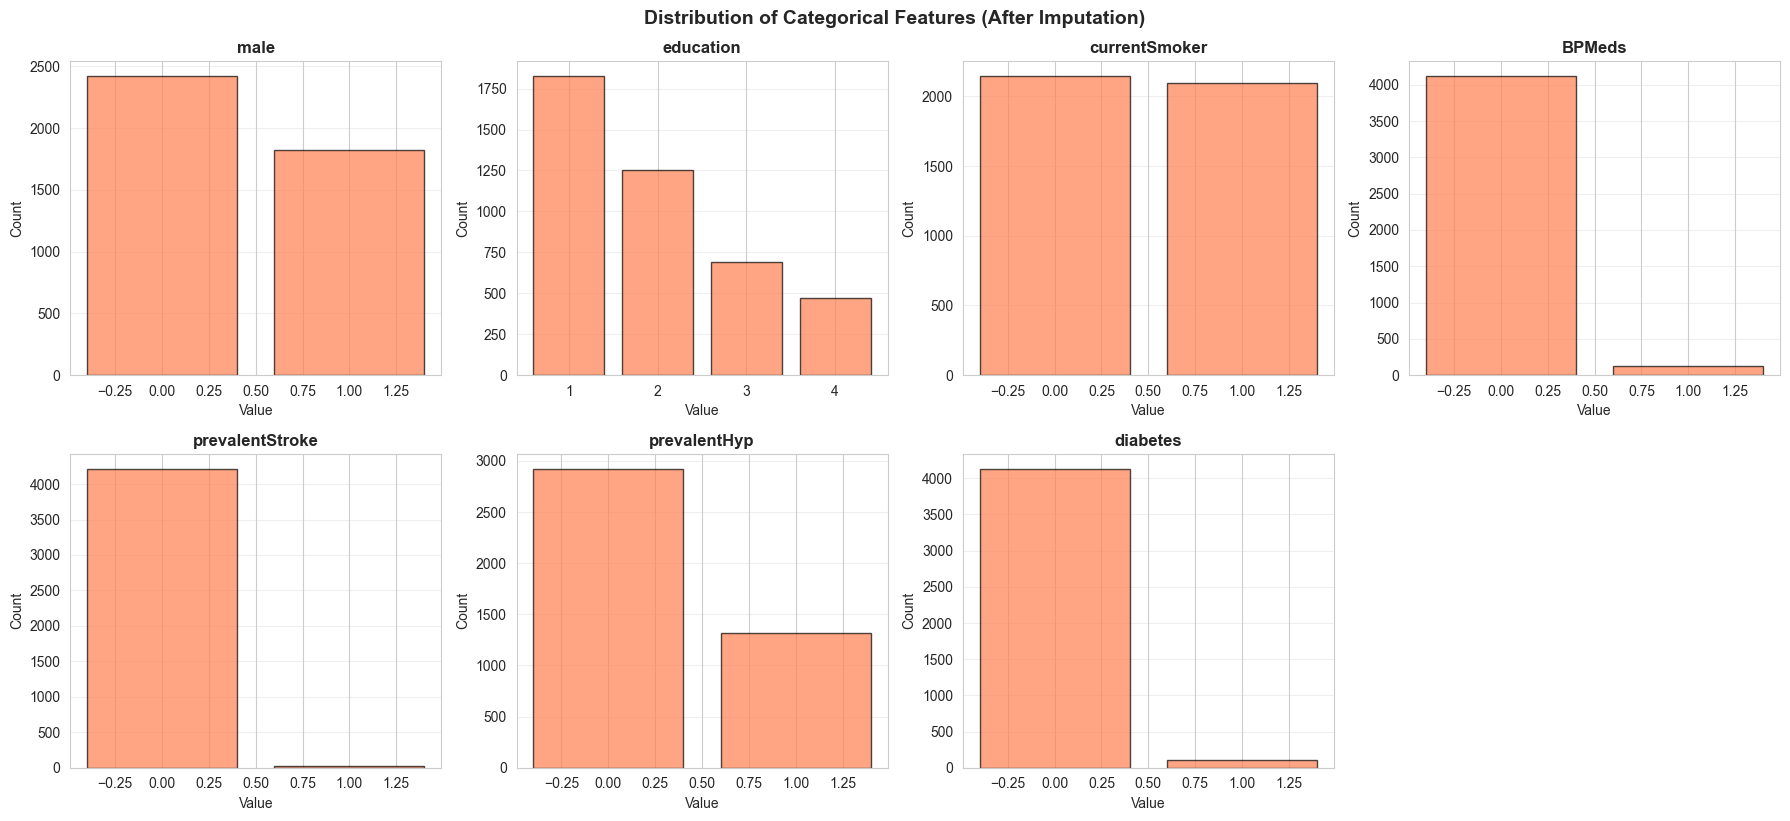

In [41]:
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = df_clean[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, alpha=0.7, color='coral', edgecolor='black')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)

axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Categorical Features (After Imputation)', y=1.02, fontsize=14, fontweight='bold')
plt.show()

### Step 4: Outlier Detection and Treatment

**Why Outliers Matter in Medical Data:**
- Outliers can be:
  - **Data entry errors** (e.g., blood pressure of 500 mmHg)
  - **True extreme values** (e.g., patient with severe hypertension)
  - **Measurement errors** (e.g., faulty equipment)

**Detection Methods:**
1. **Statistical Methods**: IQR (Interquartile Range), Z-score
2. **Visual Methods**: Box plots, scatter plots
3. **Model-based Methods**: Isolation Forest, DBSCAN

**Handling Strategies:**
- Remove if clearly erroneous
- Cap/floor (winsorization) to reasonable medical ranges
- Keep if biologically plausible

Let's detect and analyze outliers in our continuous features!

In [42]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100,
        'outlier_indices': outliers.index.tolist()
    }

print("="*100)

outlier_summary = []

for col in numerical_cols:
    outlier_info = detect_outliers_iqr(df_clean, col)
    outlier_summary.append(outlier_info)
    
    print(f"\n{col.upper()}")
    print(f"  Q1 (25%): {outlier_info['Q1']:.2f}")
    print(f"  Q3 (75%): {outlier_info['Q3']:.2f}")
    print(f"  IQR: {outlier_info['IQR']:.2f}")
    print(f"  Lower Bound: {outlier_info['lower_bound']:.2f}")
    print(f"  Upper Bound: {outlier_info['upper_bound']:.2f}")
    print(f"  Outliers Detected: {outlier_info['num_outliers']} ({outlier_info['outlier_percentage']:.2f}%)")
    
print("\n" + "="*100)


AGE
  Q1 (25%): 42.00
  Q3 (75%): 56.00
  IQR: 14.00
  Lower Bound: 21.00
  Upper Bound: 77.00
  Outliers Detected: 0 (0.00%)

CIGSPERDAY
  Q1 (25%): 0.00
  Q3 (75%): 20.00
  IQR: 20.00
  Lower Bound: -30.00
  Upper Bound: 50.00
  Outliers Detected: 12 (0.28%)

TOTCHOL
  Q1 (25%): 206.00
  Q3 (75%): 262.00
  IQR: 56.00
  Lower Bound: 122.00
  Upper Bound: 346.00
  Outliers Detected: 57 (1.34%)

SYSBP
  Q1 (25%): 117.00
  Q3 (75%): 144.00
  IQR: 27.00
  Lower Bound: 76.50
  Upper Bound: 184.50
  Outliers Detected: 126 (2.97%)

DIABP
  Q1 (25%): 75.00
  Q3 (75%): 90.00
  IQR: 15.00
  Lower Bound: 52.50
  Upper Bound: 112.50
  Outliers Detected: 77 (1.82%)

BMI
  Q1 (25%): 23.08
  Q3 (75%): 28.03
  IQR: 4.95
  Lower Bound: 15.65
  Upper Bound: 35.46
  Outliers Detected: 97 (2.29%)

HEARTRATE
  Q1 (25%): 68.00
  Q3 (75%): 83.00
  IQR: 15.00
  Lower Bound: 45.50
  Upper Bound: 105.50
  Outliers Detected: 76 (1.79%)

GLUCOSE
  Q1 (25%): 72.00
  Q3 (75%): 85.00
  IQR: 13.00
  Lower Bound: 52

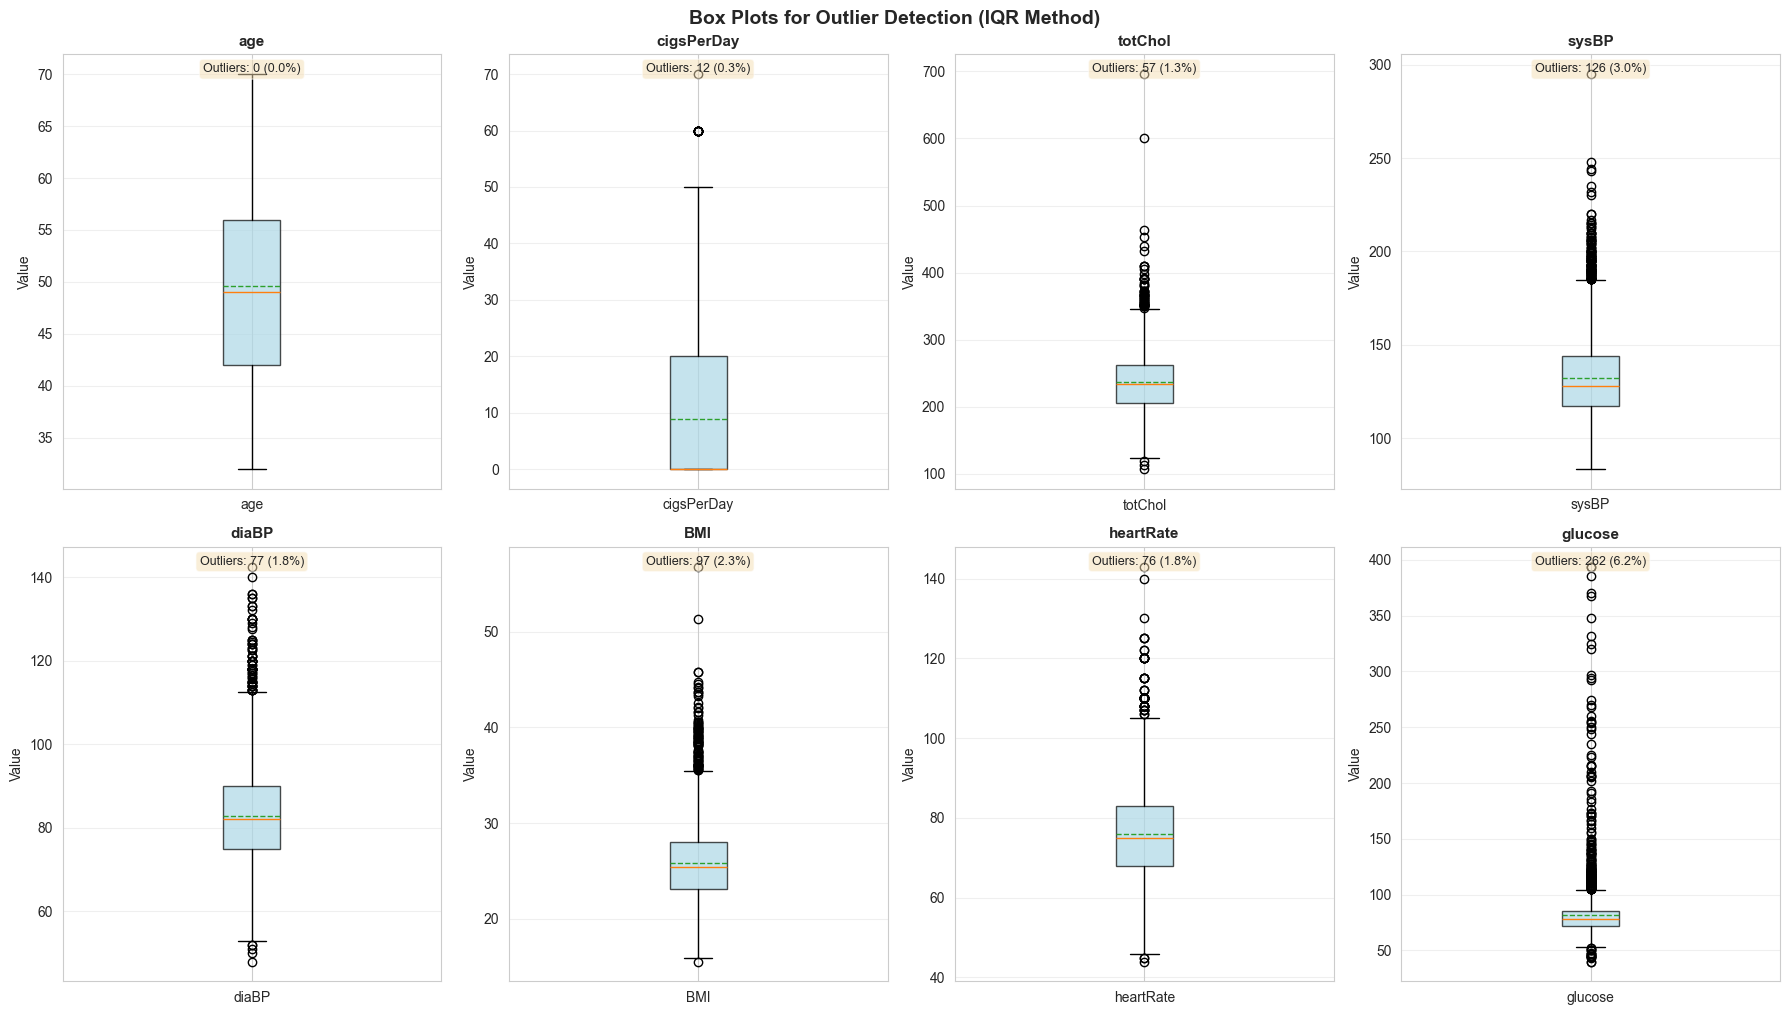


Box Plot Legend:
  • Box: 25th to 75th percentile (IQR)
  • Orange line: Median
  • Green dashed line: Mean
  • Whiskers: 1.5 × IQR from quartiles
  • Circles: Outliers beyond whiskers


In [43]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Create box plot
    bp = axes[idx].boxplot([df_clean[col]], labels=[col], patch_artist=True, 
                           showmeans=True, meanline=True)
    
    # Color the box
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Add title and labels
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Find and display outlier count
    outlier_info = next(info for info in outlier_summary if info['column'] == col)
    axes[idx].text(0.5, 0.98, f"Outliers: {outlier_info['num_outliers']} ({outlier_info['outlier_percentage']:.1f}%)",
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   fontsize=9)

plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection (IQR Method)', y=1.01, fontsize=14, fontweight='bold')
plt.show()

print("\nBox Plot Legend:")
print("  • Box: 25th to 75th percentile (IQR)")
print("  • Orange line: Median")
print("  • Green dashed line: Mean")
print("  • Whiskers: 1.5 × IQR from quartiles")
print("  • Circles: Outliers beyond whiskers")

In [44]:
from scipy import stats

z_score_outliers = {}

for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df_clean[col]))
    outlier_mask = z_scores > 3
    num_outliers = outlier_mask.sum()
    outlier_pct = (num_outliers / len(df_clean)) * 100
    
    z_score_outliers[col] = {
        'num_outliers': num_outliers,
        'percentage': outlier_pct,
        'indices': df_clean[outlier_mask].index.tolist()
    }
    
    print(f"{col:15s}: {num_outliers:4d} outliers ({outlier_pct:5.2f}%)")

print("="*100)
print("\nNote: Z-score method assumes normal distribution.")
print("      |Z| > 3 means the value is more than 3 standard deviations from the mean.")

age            :    0 outliers ( 0.00%)
cigsPerDay     :   21 outliers ( 0.50%)
totChol        :   25 outliers ( 0.59%)
sysBP          :   48 outliers ( 1.13%)
diaBP          :   41 outliers ( 0.97%)
BMI            :   60 outliers ( 1.42%)
heartRate      :   23 outliers ( 0.54%)
glucose        :   50 outliers ( 1.18%)

Note: Z-score method assumes normal distribution.
      |Z| > 3 means the value is more than 3 standard deviations from the mean.


### Handling Outliers: Medical Context Matters!

Before removing outliers, we need to consider **clinical plausibility**:

| Feature | Typical Range | Concerning Outliers | Decision |
|---------|---------------|---------------------|----------|
| **totChol** | 150-300 mg/dL | >400 (familial hypercholesterolemia) | **Keep** - medically possible |
| **glucose** | 70-100 mg/dL (fasting) | >200 (diabetes) | **Keep** - diabetes patients |
| **sysBP** | 90-140 mmHg | >200 (hypertensive crisis) | **Keep** - severe hypertension |
| **BMI** | 18.5-30 | >40 (severe obesity) | **Keep** - obesity epidemic |
| **heartRate** | 60-100 bpm | <50 (athletes) or >100 (tachycardia) | **Keep** - both are real |
| **cigsPerDay** | 0-20 | >40 (heavy smokers) | **Keep** - heavy smoking exists |

**Strategy for Medical Data:**
1. ✅ **Keep outliers** that are clinically plausible (most cases in this dataset)
2. ⚠️ Only remove if clearly impossible (e.g., negative values where impossible)
3. 🔍 **Document** all outlier decisions for reproducibility
4. 💡 Consider using **RobustScaler** instead of removing outliers (next section!)

For this analysis, we'll **keep all outliers** as they represent real medical conditions.

## Part 4: Normalization and Standardization

### Step 5: Feature Scaling

**Why Scale Features?**

Machine learning algorithms perform better when features are on similar scales:
- **Gradient-based algorithms** (Logistic Regression, Neural Networks) converge faster
- **Distance-based algorithms** (KNN, SVM) need scaled features for fair comparisons
- Features with larger ranges can dominate the model

**Example Without Scaling:**
- `age`: 30-70 (range: 40)
- `totChol`: 100-400 (range: 300)
- Model may treat cholesterol as 7.5× more important than age!

**Three Common Scaling Methods:**

| Method | Formula | Range | When to Use | Robust to Outliers? |
|--------|---------|-------|-------------|---------------------|
| **StandardScaler** | (x - μ) / σ | Mean=0, Std=1 | Default choice, assumes normal distribution | ❌ No |
| **MinMaxScaler** | (x - min) / (max - min) | [0, 1] | When you need bounded range | ❌ No |
| **RobustScaler** | (x - median) / IQR | Varies | **Medical data with outliers** | ✅ Yes |

**For Medical Data: Use RobustScaler!**
- Uses median and IQR instead of mean and std
- Not affected by extreme values (hypertension, obesity, diabetes)
- Preserves clinically important outliers

### ⚠️ CRITICAL: Train-Test Split BEFORE Scaling

**DATA LEAKAGE WARNING:**

One of the most common and dangerous mistakes in machine learning is **data leakage** during preprocessing.

**The Problem:**
- If you scale (or normalize) your data BEFORE splitting into train/test sets, the scaler will "see" statistics from the entire dataset
- This means test set information leaks into the training process
- Your model will appear to perform better than it actually will on truly unseen data
- This leads to **overoptimistic performance estimates**

**The Solution:**
```python
# ✅ CORRECT ORDER:
1. Split data into train and test sets
2. Fit scaler on TRAINING data only
3. Transform both training and test data using the fitted scaler

# ❌ WRONG ORDER:
1. Scale entire dataset
2. Split into train and test  # Too late! Test statistics already leaked
```

**Why This Matters:**
- Scaling uses dataset statistics (mean, std, min, max, median, IQR)
- The scaler should only learn from training data
- Test data represents future, unseen patients - the scaler shouldn't "know" about them

Let's do it the right way!

In [45]:
# Separate features and target
X = df_clean.drop('TenYearCHD', axis=1)
y = df_clean['TenYearCHD']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size:     {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nClass distribution in training set:")
print(f"  No CHD (0): {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"  CHD (1):    {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

print(f"\nClass distribution in test set:")
print(f"  No CHD (0): {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"  CHD (1):    {(y_test == 1).sum():,} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")

Training set size: 3,392 samples (80.0%)
Test set size:     848 samples (20.0%)

Class distribution in training set:
  No CHD (0): 2,877 (84.82%)
  CHD (1):    515 (15.18%)

Class distribution in test set:
  No CHD (0): 719 (84.79%)
  CHD (1):    129 (15.21%)


In [46]:
# Compare different scaling methods
print("\nComparing Scaling Methods on Training Data")
print("="*100)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Fit scalers on training data only
X_train_standard = standard_scaler.fit_transform(X_train)
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_train_robust = robust_scaler.fit_transform(X_train)

# Transform test data using fitted scalers
X_test_standard = standard_scaler.transform(X_test)
X_test_minmax = minmax_scaler.transform(X_test)
X_test_robust = robust_scaler.transform(X_test)

# Convert back to DataFrames for analysis
X_train_standard_df = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_train_robust_df = pd.DataFrame(X_train_robust, columns=X_train.columns)

print("\nExample: Scaling statistics for 'age' feature")
print("-"*100)

feature = 'age'
print(f"{'Method':<20} {'Mean':>10} {'Std':>10} {'Min':>10} {'Max':>10} {'Median':>10}")
print("-"*100)

# Original
print(f"{'Original':<20} {X_train[feature].mean():>10.2f} {X_train[feature].std():>10.2f} "
      f"{X_train[feature].min():>10.2f} {X_train[feature].max():>10.2f} {X_train[feature].median():>10.2f}")

# StandardScaler
print(f"{'StandardScaler':<20} {X_train_standard_df[feature].mean():>10.2f} {X_train_standard_df[feature].std():>10.2f} "
      f"{X_train_standard_df[feature].min():>10.2f} {X_train_standard_df[feature].max():>10.2f} {X_train_standard_df[feature].median():>10.2f}")

# MinMaxScaler
print(f"{'MinMaxScaler':<20} {X_train_minmax_df[feature].mean():>10.2f} {X_train_minmax_df[feature].std():>10.2f} "
      f"{X_train_minmax_df[feature].min():>10.2f} {X_train_minmax_df[feature].max():>10.2f} {X_train_minmax_df[feature].median():>10.2f}")

# RobustScaler
print(f"{'RobustScaler':<20} {X_train_robust_df[feature].mean():>10.2f} {X_train_robust_df[feature].std():>10.2f} "
      f"{X_train_robust_df[feature].min():>10.2f} {X_train_robust_df[feature].max():>10.2f} {X_train_robust_df[feature].median():>10.2f}")

print("-"*100)


Comparing Scaling Methods on Training Data

Example: Scaling statistics for 'age' feature
----------------------------------------------------------------------------------------------------
Method                     Mean        Std        Min        Max     Median
----------------------------------------------------------------------------------------------------
Original                  49.66       8.57      32.00      70.00      49.00
StandardScaler             0.00       1.00      -2.06       2.37      -0.08
MinMaxScaler               0.46       0.23       0.00       1.00       0.45
RobustScaler               0.05       0.61      -1.21       1.50       0.00
----------------------------------------------------------------------------------------------------


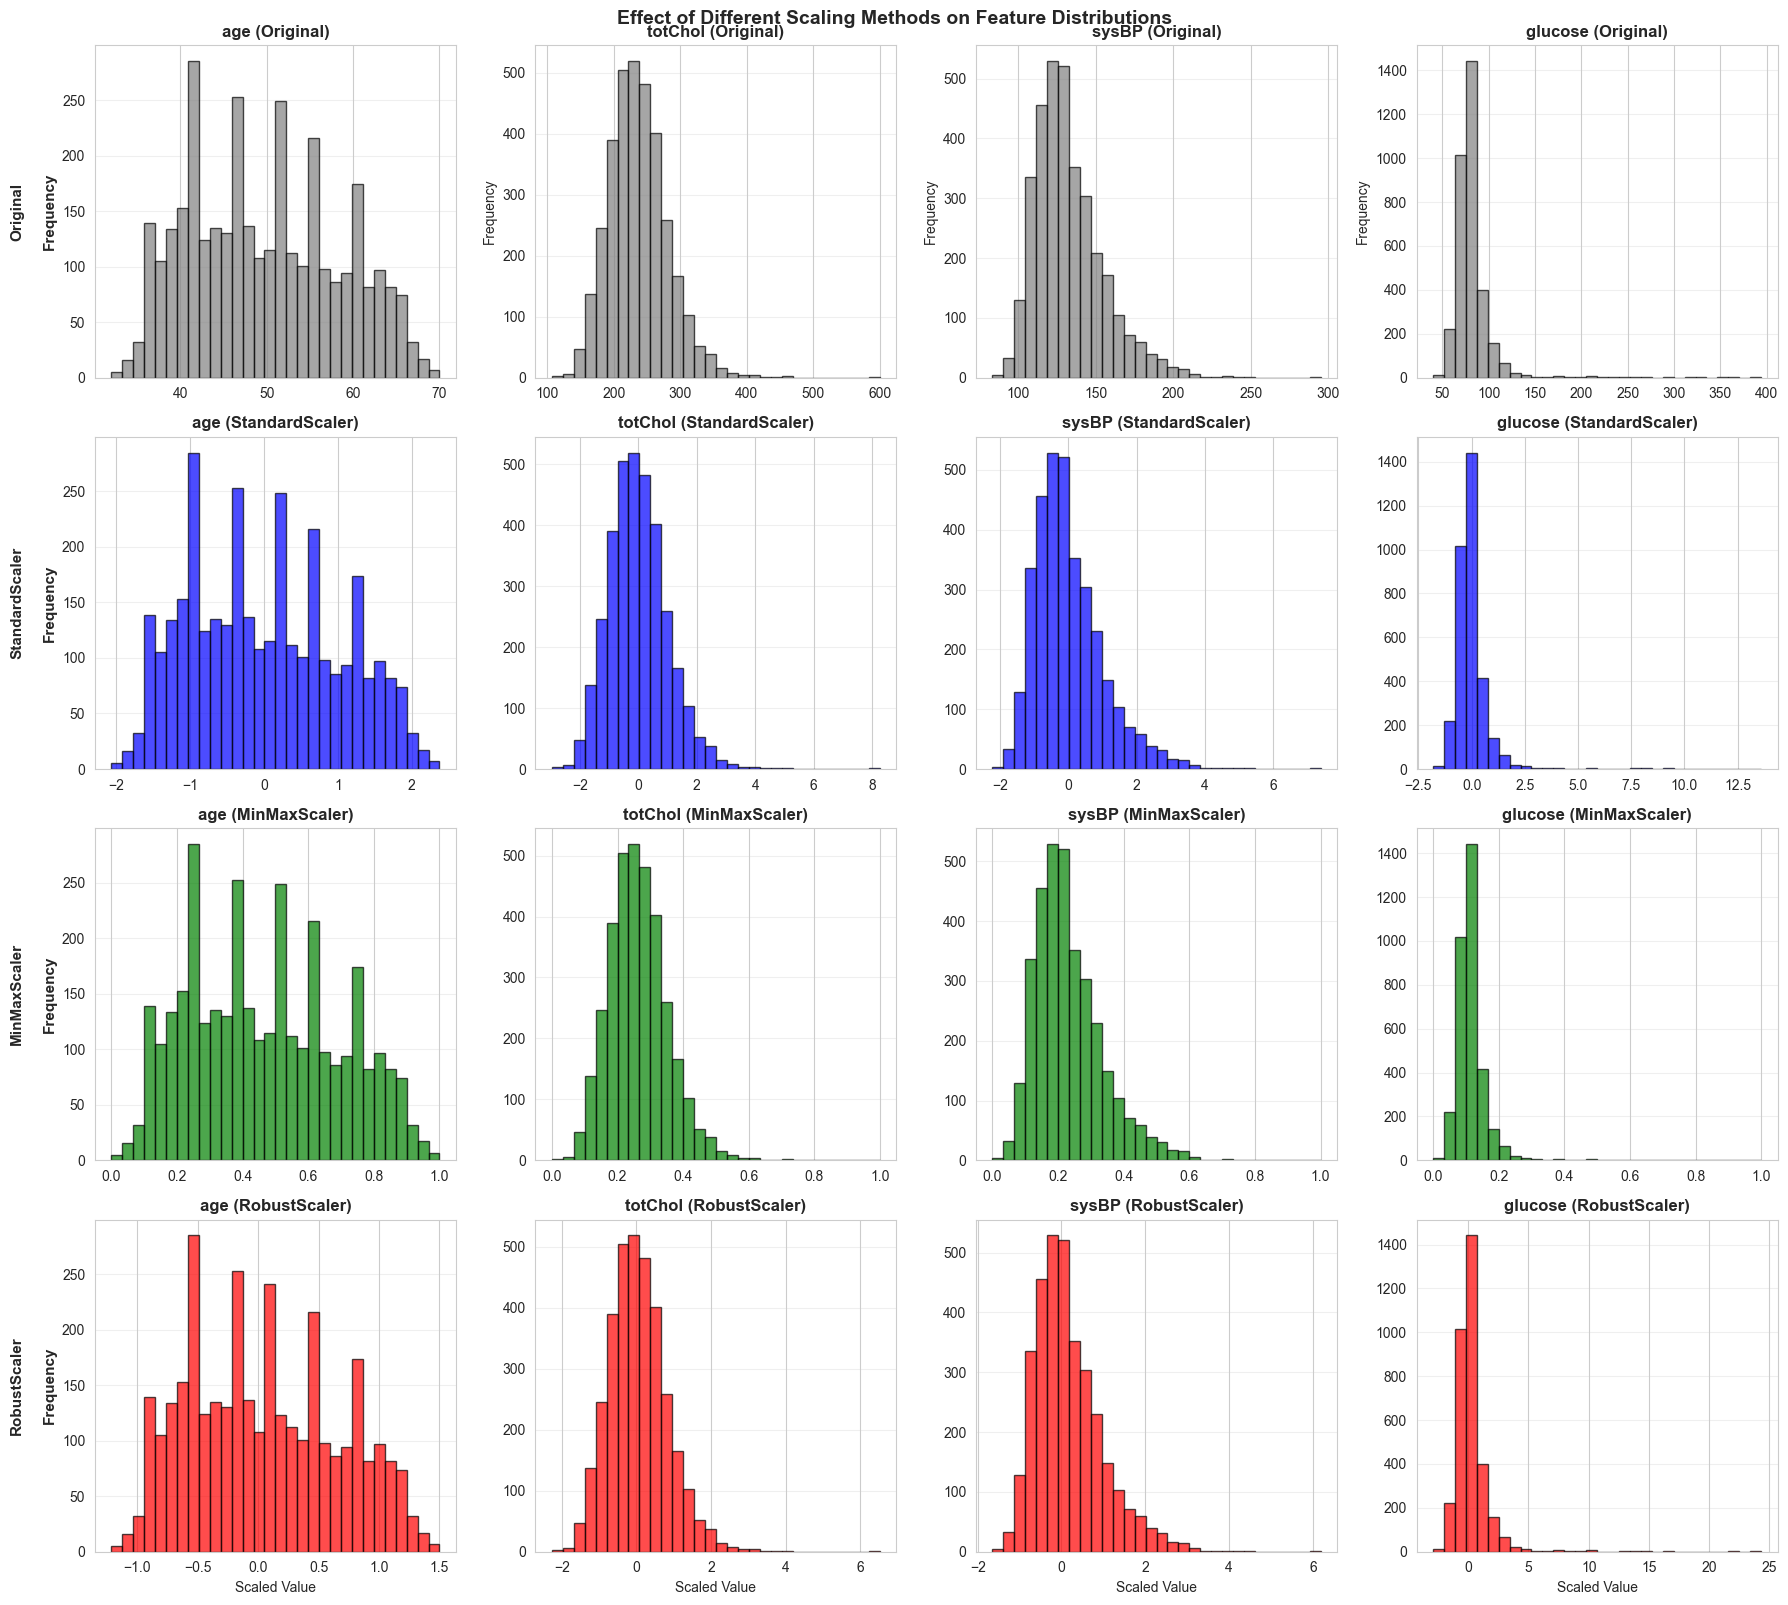


Observations:
  • StandardScaler: Centers data around 0 with std=1
  • MinMaxScaler: Squashes data into [0, 1] range
  • RobustScaler: Uses median and IQR, preserves outlier structure


In [47]:
# Visualize the effect of different scaling methods
fig, axes = plt.subplots(4, 4, figsize=(18, 16))

# Select 4 features to visualize
features_to_plot = ['age', 'totChol', 'sysBP', 'glucose']

for col_idx, feature in enumerate(features_to_plot):
    # Original
    axes[0, col_idx].hist(X_train[feature], bins=30, alpha=0.7, color='gray', edgecolor='black')
    axes[0, col_idx].set_title(f'{feature} (Original)', fontweight='bold')
    axes[0, col_idx].set_ylabel('Frequency')
    axes[0, col_idx].grid(axis='y', alpha=0.3)
    if col_idx == 0:
        axes[0, col_idx].set_ylabel('Original\n\nFrequency', fontsize=11, fontweight='bold')
    
    # StandardScaler
    axes[1, col_idx].hist(X_train_standard_df[feature], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[1, col_idx].set_title(f'{feature} (StandardScaler)', fontweight='bold')
    axes[1, col_idx].grid(axis='y', alpha=0.3)
    if col_idx == 0:
        axes[1, col_idx].set_ylabel('StandardScaler\n\nFrequency', fontsize=11, fontweight='bold')
    
    # MinMaxScaler
    axes[2, col_idx].hist(X_train_minmax_df[feature], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[2, col_idx].set_title(f'{feature} (MinMaxScaler)', fontweight='bold')
    axes[2, col_idx].grid(axis='y', alpha=0.3)
    if col_idx == 0:
        axes[2, col_idx].set_ylabel('MinMaxScaler\n\nFrequency', fontsize=11, fontweight='bold')
    
    # RobustScaler
    axes[3, col_idx].hist(X_train_robust_df[feature], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[3, col_idx].set_title(f'{feature} (RobustScaler)', fontweight='bold')
    axes[3, col_idx].set_xlabel('Scaled Value')
    axes[3, col_idx].grid(axis='y', alpha=0.3)
    if col_idx == 0:
        axes[3, col_idx].set_ylabel('RobustScaler\n\nFrequency', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.suptitle('Effect of Different Scaling Methods on Feature Distributions', 
             y=1.00, fontsize=14, fontweight='bold')
plt.show()

print("\nObservations:")
print("  • StandardScaler: Centers data around 0 with std=1")
print("  • MinMaxScaler: Squashes data into [0, 1] range")
print("  • RobustScaler: Uses median and IQR, preserves outlier structure")

### Summary: Best Practices for Feature Scaling

**When to Scale:**
- ✅ Always for: Logistic Regression, Neural Networks, SVM, KNN
- ⚠️ Sometimes for: Regularized models (Lasso, Ridge)
- ❌ Never for: Tree-based models (Random Forest, XGBoost, Decision Trees)

**Which Scaler to Choose:**

| Your Data | Best Choice | Reason |
|-----------|-------------|--------|
| **Medical data with outliers** | RobustScaler | Resistant to extreme values |
| **Normal distribution, few outliers** | StandardScaler | Optimal for Gaussian data |
| **Need bounded range [0,1]** | MinMaxScaler | Fixed range, good for neural networks |
| **Mixed data types** | Scale continuous only | Leave categorical as-is |

**Critical: Avoid Data Leakage!**
```python
# ✅ CORRECT: Fit on training, transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use fitted scaler

# ❌ WRONG: Fitting on entire dataset
scaler.fit(X)  # Leaks test data statistics!
```

**For This Dataset:**
We've prepared scaled versions using all three methods. In practice:
- Use **RobustScaler** for medical data (default recommendation)
- Use **StandardScaler** if data is approximately normal
- Always validate performance with your specific model and dataset

## Conclusion: Complete Preprocessing Pipeline

Congratulations! You've completed a comprehensive data preprocessing workflow for medical data. Here's what we accomplished:

### Summary of Preprocessing Steps:

| Step | Task | Method Used | Result |
|------|------|-------------|--------|
| **1. Missing Values** | Handled 645 missing values | Median (continuous), Mode (categorical) | 0 missing values |
| **2. Class Imbalance** | Addressed 5.58:1 imbalance | SMOTE, Undersampling, Oversampling | Balanced datasets |
| **3. Feature Distribution** | Analyzed distributions | Histograms, boxplots | Understood data characteristics |
| **4. Outliers** | Detected and handled outliers | IQR, Z-score methods | Kept clinically valid outliers |
| **5. Scaling** | Normalized feature ranges | StandardScaler, MinMaxScaler, RobustScaler | Ready for modeling |

### Key Lessons for Medical Data:

1. **Missing Values**: Use domain knowledge - median for continuous, mode for categorical
2. **Class Imbalance**: SMOTE is preferred - creates synthetic samples without data loss
3. **Outliers**: Keep medically plausible outliers - they're often the most important cases!
4. **Scaling**: RobustScaler is best for medical data with extreme values
5. **Data Leakage**: Always split before scaling - fit on training only!

### Next Steps:

The data is now ready for:
- Feature engineering and selection
- Model training and evaluation
- Hyperparameter tuning
- Clinical validation

### Available Datasets for Modeling:

```python
# Original cleaned data (for tree-based models)
X_train, X_test, y_train, y_test

# Scaled versions (for logistic regression, neural networks)
X_train_standard, X_test_standard  # StandardScaler
X_train_minmax, X_test_minmax      # MinMaxScaler
X_train_robust, X_test_robust      # RobustScaler (recommended)

# Balanced datasets (for handling class imbalance)
X_smote, y_smote    # SMOTE oversampling
X_under, y_under    # Random undersampling
X_over, y_over      # Random oversampling
```